In [ ]:
import numpy as np
from amopt.pricing.pricing import AmericanOptionPricer
from amopt.models.longstaff_schwartz import payoff_call,payoff_put
import matplotlib.pyplot as plt

In [2]:

# Definiujemy parametry opcji i siatkę dat wykonania
spot_price      = 40
strike          = 40
risk_free_rate  = 0.06
q=0.02  # stopa dywidendy ciągłej
volatility      = 0.20
time_to_maturity= 1.0
M=5
execution_times = np.linspace(0, time_to_maturity, M+1) # wykonania co ćwierć roku: [0,0.25,0.5,0.75,1.0]
n_paths_mesh    = 100  # liczba ścieżek w Stochastic Mesh
n_paths_lsm     = 100000# liczba ścieżek w Longstaff–Schwartz

In [3]:
pricer = AmericanOptionPricer(
    [spot_price],
    strike,
    risk_free_rate,
    [volatility],
    time_to_maturity,
    execution_times,
    n_paths_mesh,
    corr=[[1]],
    dividend_yield=[q],
    seed=123
)

# USTAWIAMY PARAMETRY DLA WSZYSTKICH METOD

# LONGSTAFF-SCHWARTZ

In [4]:
pricer.set_payoff_function(payoff_put(strike)) # Dla longstaff-schwartz musi byc inny payoff niz dla mesha

In [5]:
lsm_price=pricer.longstaff_schwartz(num_paths=n_paths_lsm)# CHCESZ TYLE SCIEZEK ILE ZADANE
lsm_price

44 1
43 1
46 1
45 1
48 1


2.170411716687631

# BJERKSUND-STENSLAND

In [6]:
bjs_price=pricer.bjerksund_stensland(option_type='put')
bjs_price[0]

2.4935957598903364

# STOCHASTIC MESH

In [7]:
def put_at_strike_payoff(S):
    return np.maximum(strike-S, 0)# funkcja wypłaty dla opcji put przy wykonaniu na strike dla mesha
pricer.set_payoff_function(put_at_strike_payoff)
pricer.stochastic_mesh(10)# musi byc mega mala ilosc sciezek bo dlugo liczy (cos innego niz n_paths_mesh)

(1.2035934020224275, 1.3758556815621032)

## Wykres

In [8]:
def call_at_strike_payoff(S):
    return np.maximum(S-strike, 0)# funkcja wypłaty dla opcji put przy wykonaniu na strike dla mesha

In [9]:

# Zakres strike'ów
strike_range = np.linspace(30, 50, 11)

# Wyniki
prices_lsm = []
prices_mesh = []
prices_bjs = []

for strike in strike_range:
    pricer = AmericanOptionPricer(
        [spot_price],
        strike,
        risk_free_rate,
        [volatility],
        time_to_maturity,
        execution_times,
        n_paths_mesh,
        corr=[[1]],
        dividend_yield=[q],
        seed=42
    )
    # LSM
    pricer.set_payoff_function(payoff_call(strike)) 
    price_lsm = pricer.longstaff_schwartz(num_paths=n_paths_lsm)
    prices_lsm.append(price_lsm)

    # Mesh
    pricer.set_payoff_function(call_at_strike_payoff)
    price_mesh = pricer.stochastic_mesh(10)  # Używamy małej liczby ścieżek
    prices_mesh.append(price_mesh)

    # Binomial
    price_bjs = pricer.bjerksund_stensland(option_type='call')
    prices_bjs.append(price_bjs)




96 1
98 1
100 1
100 1
100 1
94 1
96 1
99 1
98 1
100 1
85 1
95 1
90 1
95 1
100 1
77 1
82 1
86 1
84 1
89 1
66 1
70 1
70 1
67 1
78 1
56 1
55 1
54 1
56 1
52 1
44 1
46 1
45 1
42 1
28 1
37 1
33 1
29 1
23 1
14 1
28 1
23 1
14 1
14 1
5 1
21 1
14 1
11 1
6 1
15 1
5 1
6 1
2 1


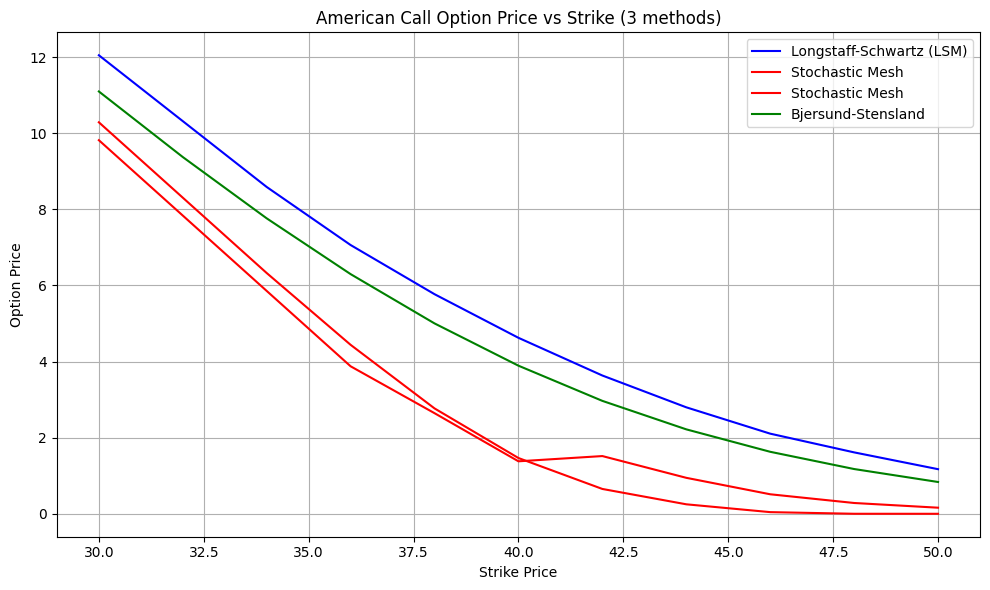

In [10]:
# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(strike_range, prices_lsm, label='Longstaff-Schwartz (LSM)',color='blue')
plt.plot(strike_range, prices_mesh, label='Stochastic Mesh', color='red')
plt.plot(strike_range, prices_bjs, label='Bjersund-Stensland', color='green')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('American Call Option Price vs Strike (3 methods)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

51 1
55 1
52 1
53 1
52 1
53 1
50 1
53 1
50 1
51 1
53 1
52 1
52 1
50 1
54 1
53 1
54 1
52 1
52 1
52 1
53 1
53 1
53 1
50 1
51 1
51 1
53 1
51 1
52 1
51 1
50 1
51 1
53 1
52 1
54 1
51 1
52 1
51 1
51 1
50 1
50 1
50 1
50 1
50 1
50 1
51 1
50 1
51 1
51 1
51 1
49 1
47 1
50 1
47 1
48 1
48 1
50 1
48 1
50 1
49 1
49 1
49 1
49 1
50 1
48 1
47 1
48 1
48 1
48 1
50 1
48 1
47 1
49 1
50 1
50 1
49 1
49 1
49 1
50 1
49 1
50 1
49 1
48 1
48 1
48 1
50 1
48 1
49 1
49 1
50 1
50 1
50 1
50 1
50 1
50 1
49 1
50 1
49 1
49 1
49 1
44 1
41 1
46 1
44 1
46 1
47 1
50 1
47 1
45 1
47 1
45 1
47 1
46 1
49 1
45 1
45 1
45 1
46 1
45 1
47 1
45 1
45 1
44 1
48 1
47 1
48 1
47 1
49 1
48 1
49 1
50 1
49 1
46 1
47 1
46 1
49 1
47 1
49 1
45 1
49 1
50 1
48 1
50 1
50 1
49 1
49 1
49 1
49 1
49 1
48 1
42 1
40 1
42 1
40 1
43 1
46 1
49 1
46 1
45 1
45 1
43 1
45 1
45 1
47 1
44 1
44 1
40 1
45 1
43 1
46 1
42 1
42 1
43 1
44 1
47 1
46 1
46 1
46 1
47 1
49 1
49 1
49 1
45 1
45 1
45 1
47 1
45 1
48 1
44 1
45 1
48 1
47 1
50 1
49 1
48 1
49 1
48 1
49 1
49 1
48 1


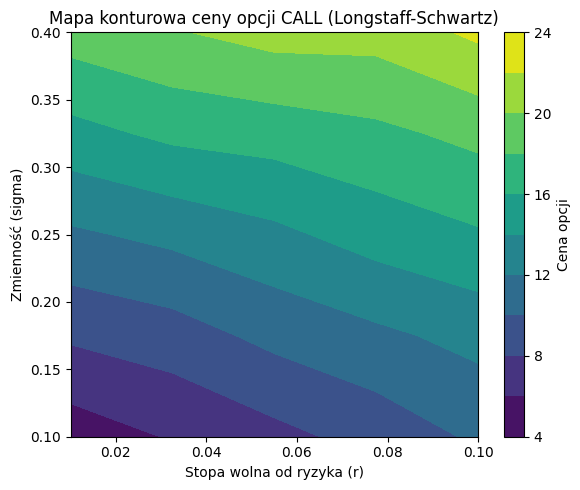

In [11]:
def longstaff_schwartz(S0, K, r, sigma, T, M, N):
    pricer = AmericanOptionPricer(
        [S0], K, r, [sigma], T, np.linspace(0, T, M+1),
        n_paths_mesh=100, corr=[[1]], dividend_yield=[0.0], seed=123
    )
    pricer.set_payoff_function(payoff_call(K))
    return pricer.longstaff_schwartz(num_paths=N)


# --- MAPA KONTOUROWA ---
S0, K, T, M, N = 100, 100, 1.0, 50, 2000
r_vals = np.linspace(0.01, 0.10, 5)
sigma_vals = np.linspace(0.1, 0.4, 5)

prices = np.zeros((len(r_vals), len(sigma_vals)))

for i, r in enumerate(r_vals):
    for j, sigma in enumerate(sigma_vals):
        prices[i, j] = longstaff_schwartz(S0, K, r, sigma, T, M, N)

R, Sigma = np.meshgrid(r_vals, sigma_vals, indexing='ij')

plt.figure(figsize=(6, 5))
cp = plt.contourf(R, Sigma, prices, levels=10, cmap='viridis')
plt.xlabel('Stopa wolna od ryzyka (r)')
plt.ylabel('Zmienność (sigma)')
plt.title('Mapa konturowa ceny opcji CALL (Longstaff-Schwartz)')
plt.colorbar(cp, label='Cena opcji')
plt.tight_layout()
plt.show()